# Data Wrangling Project

## Files:
1. #### twitter_archive_enhanced.csv (Downloaded file)
2. #### image_predictions.tsv (Web scarping)
 Get data via requests from Udacity's server:<br>
https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
3. #### tweet_json.txt

In [1]:
# import libraries
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

***

# 1. Gathering data
1. archive. -> from csv file
    
2. tweet_json. -> from the web
3. twitter data. -> from txt file

## 1.1 Archive data

In [2]:
# Get twitter archive data
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
tweet_id_from_archive = archive['tweet_id']
tweet_id_from_archive_list = list(tweet_id_from_archive.values)

## 1.2 Image Predictions from the Web

In [4]:
# Get tweet_json data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
r.status_code

200

In [5]:
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [6]:
image_predictions = pd.read_csv(url,sep='\t')

In [7]:
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


## 1.3 Tweet Json

In [8]:
# Save tweet data in tweet_data
tweet_data = pd.read_json('tweet_json.txt', lines=True)

In [9]:
tweet_data.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [10]:
tweet_data.isna().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 270
source                              0
in_reply_to_status_id            2250
in_reply_to_status_id_str        2250
in_reply_to_user_id              2250
in_reply_to_user_id_str          2250
in_reply_to_screen_name          2250
user                                0
geo                              2327
coordinates                      2327
place                            2326
contributors                     2327
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                132
possibly_sensitive_appealable     132
lang        

***

# 2. Assessing the data sets

Files for visual assesment are saved in google docs.

### 2.1 Archive issues

In [11]:
# overview
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [12]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
archive['expanded_urls'].isna().sum()
# Number of NaN values in expanded urls

59

In [14]:
# find the NaN values in each column
archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
# frequency of rating
archive['rating_numerator'].value_counts().head(5)

12    558
11    464
10    461
13    351
9     158
Name: rating_numerator, dtype: int64

In [16]:
archive['rating_denominator'].value_counts().head(1)

10    2333
Name: rating_denominator, dtype: int64

In [17]:
archive['tweet_id'].value_counts().head(1)

892420643555336193    1
Name: tweet_id, dtype: int64

In [18]:
archive.name.value_counts().head(2)
# find the most common names

None    745
a        55
Name: name, dtype: int64

In [19]:
archive.query('name == "None"').head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None


In [20]:
archive['source'][1]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

### 2.2 Image Predictions issues

In [21]:
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### 2.3 tweet_json issues

In [22]:
tweet_data.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


### 2.4 Issues found
#### 2.1.1 Quality issues

1. timestamp is not of data type datetime ``(archive)``

5. Some dogs' names are weired. Like 'one' or 'such'. They always begin wich a lower case letter``(archive)`` -> difficult to solve
7. Standarize nominator values of rating column ``(archive)``
8. rating_denominator values should always be 10. But it is not ``(archive)``
9. Only original ratings. No retweets nor replies ``(archive)``
10. Not needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls,  ``(archive)``)?
11. Dog name does not need '_'. Also capitalize the first letter of p1, p2, p3 ``(image_predicitons)``
12. We can see that not all ratings are on dogs. p1_dog is whether or not the #1 prediction is a breed of dog → TRUE ?``(image_predictions)``)
13. The source column contains \<a> and \</a> which are not necessary. ``(archive)``)

#### 2.1.2 Tidiness issues
1. The rating uses two columns. ``(archive)`` (Solved before Tidiness chapter)
2. There are 4 columns for the category of the dog when it's only one variable (1 variable. Category -> doggo floofer pupper puppo) ``(archive)``
3. Joining the dataframes

***

## 3. Data Cleaning

### Quality Issues

In [23]:
# Making copies of the dataframes
archive_copy = archive.copy()
tweet_data_copy = tweet_data.copy()
image_predictions_copy = image_predictions.copy()

### 3.1 Uncomment in case of removing the +0000 in the timestamp column of the archive table

In [24]:
# archive_copy['timestamp'].head(2)

In [25]:
# archive_copy['timestamp'] = archive_copy['timestamp'].str.extract('(\d{4}-\d{2}-\d{2}.\d{2}:\d{2}:\d{2})', expand=True)

In [26]:
#archive_copy['timestamp'][:5]

### 3.2 Converting the timestamp column to datetime

***Define***

timestamp to datetime data type

***Code***

In [27]:
archive_copy['timestamp'].dtypes

dtype('O')

In [28]:
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'])

In [29]:
archive_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


***Test***

In [30]:
archive_copy['timestamp'].dtypes

datetime64[ns, UTC]

In [31]:
# Check the data type
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

### 3.3 Changing dogs names' from values like 'quiet' or 'one' to None

***Define***

Change the dogs' names from values like 'quiet' and 'a' to None

***Code***

In [32]:
archive_copy['name'].str.islower().sum()

109

In [33]:
len(archive_copy['name'])

2356

In [34]:
archive_copy['name'] = np.where(archive_copy['name'].str.islower(), 'None', archive_copy['name'])

In [35]:
archive_copy['name'].str.islower().sum()

0

In [36]:
len(archive_copy['name'])

2356

***Test***

In [37]:
archive_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### 3.3 Standarize rating column

***Define***

To standarize the data, I devide every value by 10. That makes the denominator of 10 obsolet.

***Code***

In [38]:
archive_copy['rating_numerator'].value_counts().head()

12    558
11    464
10    461
13    351
9     158
Name: rating_numerator, dtype: int64

In [39]:
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [40]:
np.max(archive_copy['rating_numerator'])
# it is a high number, but as far as I know, there are no limits to the rating system

1776

#### 3.3.1 Standarize data
Since the denumerator is alway 10, we can devide the numerator by 10

In [41]:
archive_copy['rating_numerator'] = archive_copy['rating_numerator'] / 10

***Test***

In [42]:
np.mean(archive_copy['rating_numerator'])

1.3126485568760509

### 3.4 Drop the denumterator column

***Define***

Because it contains always 10, we can get rid of it

***Code***

In [43]:
archive_copy.drop('rating_denominator', axis=1, inplace=True);

***Test***

In [44]:
archive_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [45]:
archive_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,1.3,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,1.3,Tilly,None,None,None,None


### 3.5 Dropping the rows from retweets or replies

***Define***

We don't need the retweets or replies rows. So we drop them.

***Code***

In [46]:
archive_copy['retweeted_status_user_id'].notna().sum()

181

In [47]:
len(archive_copy)

2356

In [48]:
archive_copy['in_reply_to_user_id'].notna().sum()

78

In [49]:
archive_copy = archive_copy[archive_copy['in_reply_to_user_id'].isnull()]
archive_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,1.3,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,1.3,Tilly,None,None,None,None


***Test***

In [50]:
archive_copy['in_reply_to_user_id'].notna().sum()

0

In [51]:
archive_copy['retweeted_status_id'].value_counts(3)

8.874740e+17    0.005525
6.704450e+17    0.005525
6.671828e+17    0.005525
6.661041e+17    0.005525
7.717705e+17    0.005525
                  ...   
7.950767e+17    0.005525
7.840579e+17    0.005525
8.222448e+17    0.005525
8.224891e+17    0.005525
6.675484e+17    0.005525
Name: retweeted_status_id, Length: 181, dtype: float64

In [52]:
archive_copy = archive_copy[archive_copy['retweeted_status_id'].isnull()]

In [53]:
# for visual examination in google docs
archive_copy.to_csv('archive_excel_check.csv', encoding='utf-8', index=False)

### 3.6 Dropping columns that are not needed

***Define***

Some columns (like in_reply_to_status_id) are not needed. So we drop them.

***Code***

In [54]:
archive_copy.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True);

***Test***

In [55]:
archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### 3.7 Fix names in image predictions

***Define***

The names in the image predictions contain '_'. They will be replaced by a space.

***Code***

In [56]:
image_predictions_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [57]:
image_predictions_copy.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1918,855459453768019968,https://pbs.twimg.com/media/C98z1ZAXsAEIFFn.jpg,2,Blenheim_spaniel,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,0.082628,True
490,675531475945709568,https://pbs.twimg.com/media/CV_4ShmUYAA3wNu.jpg,1,Pembroke,0.918441,True,Cardigan,0.027339,True,Siberian_husky,0.020221,True


In [58]:
# When p1 starts with a lower letter, it is a nonsence value and we set it to None
image_predictions_copy['p1'] = np.where(image_predictions_copy['p1'].str.islower(), 'None', image_predictions_copy['p1'])

In [59]:
image_predictions_copy['p1'] = image_predictions_copy['p1'].str.replace('_', ' ')

In [60]:
image_predictions_copy['p1'] = image_predictions_copy['p1'].str.title()

In [61]:
image_predictions_copy.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
652,682032003584274432,https://pbs.twimg.com/media/CXcQfUNUQAEwFoQ.jpg,1,None,0.997953,True,groenendael,0.000676,True,miniature_pinscher,0.000211,True
983,707411934438625280,https://pbs.twimg.com/media/CdE7ZktXIAEiWLj.jpg,1,Lakeland Terrier,0.738277,True,Airedale,0.028515,True,giant_schnauzer,0.024876,True


In [62]:
# do the same for p2 and p3

In [63]:
image_predictions_copy['p2'] = image_predictions_copy['p2'].str.replace('_', ' ')
image_predictions_copy['p2'] = image_predictions_copy['p2'].str.title()

In [64]:
image_predictions_copy['p3'] = image_predictions_copy['p3'].str.replace('_', ' ')
image_predictions_copy['p3'] = image_predictions_copy['p3'].str.title()

***Test***

In [65]:
image_predictions_copy.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,None,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,None,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False


***Define***

Some rows are not dogs. Those rows will we dropped.

***Code***

In [66]:
image_predictions_copy.drop(image_predictions_copy[image_predictions_copy.p1_dog == False].index, inplace=True)

In [67]:
image_predictions_copy.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,None,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True


***Test***

In [68]:
image_predictions_copy[image_predictions_copy['p1'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


***Define***

Deleting not used columns

***Code***

In [69]:
image_predictions_copy.drop(['p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

***Define***

Some columns are not needed and will also be dropped.

***Code***

In [70]:
image_predictions_copy.head(2)

,tweet_id,jpg_url,img_num,p1
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,None


In [71]:
image_predictions_copy.rename(columns={'p1':'breed'}, inplace=True)

***Test***

In [72]:
image_predictions_copy.head(2)

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,None


### Tidiness Issues

### 3.8 Put the dog stage in one column instead of 4

***Define***

Here one variable uses four columns. I will change it to one

***Code***

In [73]:
archive_copy.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,1.3,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,1.3,Tilly,None,None,None,None


In [74]:
archive_copy['stage'] = archive_copy['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)              

In [75]:
archive_copy = archive_copy.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

In [76]:
archive_copy['stage'].value_counts()

pupper     240
doggo       80
puppo       29
floofer      4
Name: stage, dtype: int64

***Test***

In [77]:
archive_copy.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,1.3,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,1.3,Tilly,NaN


## 3.9 Joining the DataFrames

***Define***

Rename the column to make to joining easier.

***Code***

In [78]:
tweet_data_copy = tweet_data_copy.rename(columns={'id' : 'tweet_id'})

***Test***

In [79]:
archive_copy.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,1.3,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,1.3,Tilly,NaN


In [80]:
tweet_data_copy.head(2)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


***Define***

In order to analyze the data later, I will put all importent data in one table.

***Code***

In [81]:
image_predictions_copy.head(2)

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,None


In [82]:
res = archive_copy.merge(image_predictions_copy, on='tweet_id', how='left')

In [83]:
res.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,1.3,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,1.3,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua


In [84]:
tweet_data_copy.retweet_count

0       7071
1       5344
2       3512
3       7280
4       7812
        ... 
2322      37
2323     117
2324      36
2325      39
2326     426
Name: retweet_count, Length: 2327, dtype: int64

### Only the number of retweets and favorite count are left to add

***Define***

Only the retweets and favorite counts are left to add.

***Code***

In [85]:
add_from_tweet_data = tweet_data_copy[['tweet_id', 'retweet_count', 'favorite_count']]
add_from_tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7071,34106
1,892177421306343426,5344,29600
2,891815181378084864,3512,22289
3,891689557279858688,7280,37278
4,891327558926688256,7812,35632
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,117,248
2324,666033412701032449,36,100
2325,666029285002620928,39,114


In [86]:
# final dataframe
df_all = res.merge(add_from_tweet_data, on='tweet_id', how='left')

***Test***

In [87]:
df_all.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage,jpg_url,img_num,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,1.3,Phineas,NaN,NaN,NaN,NaN,7071.0,34106.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,1.3,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,5344.0,29600.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,1.2,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,3512.0,22289.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,1.3,Darla,NaN,NaN,NaN,NaN,7280.0,37278.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,1.2,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,None,7812.0,35632.0


In [88]:
# Save dataframe 
df_all.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## 4. Analyzing the data

### Insights
1. From which year were most tweets?
2. What are the most frequent dog names?
3. What is the average rating for each dog breed?
### Visuals
1. Which dog breed got most favorite count?

### 4.1 From which year were most tweets?

In [89]:
df_all.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage,jpg_url,img_num,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,1.3,Phineas,NaN,NaN,NaN,NaN,7071.0,34106.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,1.3,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,5344.0,29600.0


In [90]:
df_all['timestamp'].dt.year.value_counts()

2016    1054
2015     668
2017     375
Name: timestamp, dtype: int64

Most of these tweets were published in 2016.

### 4.2 What are the most frequent dog names?

In [91]:
df_all.name.value_counts()

None          707
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 930, dtype: int64

Many dogs' names are not known. But Lucy and Charlie are very popular.

### 4.3 What is the average rating for each dog breed?

In [92]:
x = df_all.groupby(['breed'])[['rating_numerator']]

In [93]:
x.first().sort_values('rating_numerator', ascending=False).head()

,rating_numerator
breed,
Gordon Setter,1.4
Irish Setter,1.4
Pembroke,1.4
Afghan Hound,1.3
Mexican Hairless,1.3


The best-rated breeds are: Gordon Setter, Pembroke, Irish Setter with each a average rating of 1.4. (or 14)

### 4.4 Dog breed with the highest favorite count?

In [94]:
df_all.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage,jpg_url,img_num,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,1.3,Phineas,NaN,NaN,NaN,NaN,7071.0,34106.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,1.3,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,5344.0,29600.0


In [95]:
breeds = list(set(df_all['breed'].values))

In [96]:
breeds.pop(0)

nan

In [97]:
x = df_all.groupby(['breed'])[['favorite_count']]
x.first().sort_values('favorite_count', ascending=False).head(10)

,favorite_count
breed,
Lakeland Terrier,125185.0
English Springer,93644.0
Italian Greyhound,67901.0
Pomeranian,57319.0
Saluki,44950.0
None,35632.0
Shetland Sheepdog,33429.0
Border Collie,30532.0
Cardigan,30414.0


In [98]:
x

In [99]:
fav_count_per_breed = list(x.first()['favorite_count'].values)

In [100]:
highest_fav_count = df_all.filter(['breed', 'favorite_count'], axis=1).sort_values(by='favorite_count', ascending=False)
highest_fav_count



,breed,favorite_count
825,Labrador Retriever,145942.0
325,Lakeland Terrier,125185.0
419,Chihuahua,112657.0
115,French Bulldog,109822.0
864,Eskimo Dog,108056.0
...,...,...
284,Staffordshire Bullterrier,NaN
575,None,NaN
687,Labrador Retriever,NaN
727,French Bulldog,NaN


In [101]:
highest_fav_count = highest_fav_count.groupby(['breed'])[['favorite_count']].sum().sort_values(by='favorite_count', ascending=False).head(10)
highest_fav_count

,favorite_count
breed,
None,4477418.0
Labrador Retriever,911930.0
Pembroke,875479.0
Chihuahua,601389.0
Samoyed,451797.0
French Bulldog,412342.0
Pomeranian,266773.0
Eskimo Dog,229222.0
Cardigan,223856.0


<AxesSubplot:title={'center':'favorite_count per breed'}, xlabel='breed', ylabel='favorite_count'>

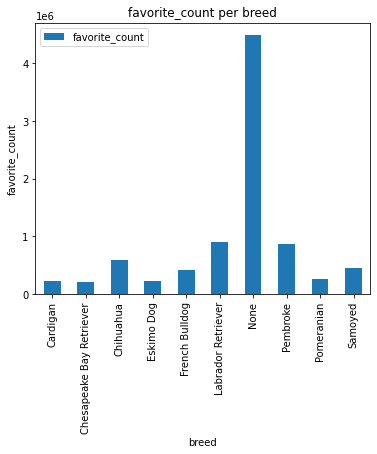

In [102]:
dfg = highest_fav_count.groupby(['breed'])[['favorite_count']].sum()

dfg.plot(kind='bar', title='favorite_count per breed', ylabel='favorite_count',
         xlabel='breed', figsize=(6, 5))

Most dogs' names are not knonw but have the highest favorite count. Labrador retrivers and Chihuahuas are also very popular.

## Random Plots

<Figure size 1080x576 with 0 Axes>

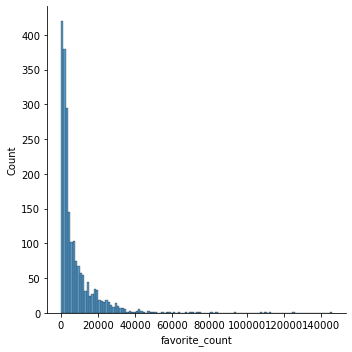

In [103]:
plt.figure(figsize=(15,8))
sns.displot(df_all.favorite_count);

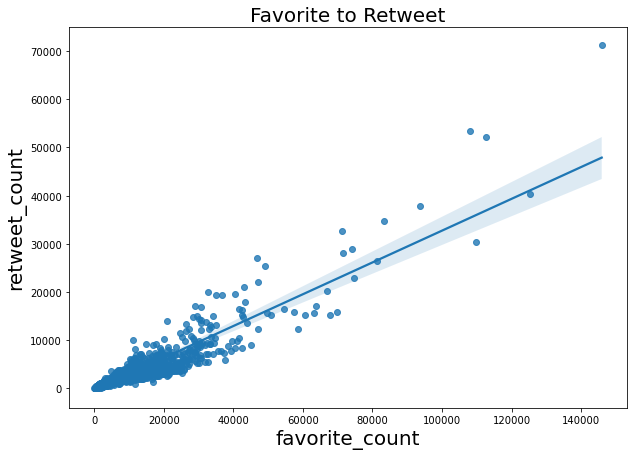

In [104]:
# Seaborn regplot
plt.figure(figsize=(10,7))
plt.title("Favorite to Retweet", size=20)
sns.regplot(x='favorite_count', y='retweet_count', data=df_all)
plt.ylabel("retweet_count", size=20)
plt.xlabel("favorite_count", size=20);

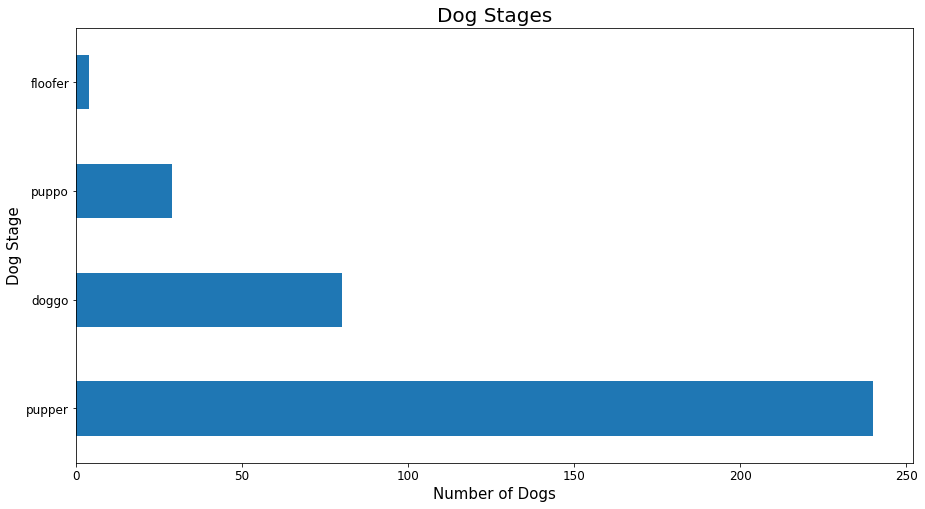

In [105]:
# Plot 4 dog stages
plt.figure(figsize=(15,8))
plt.title("Dog Stages", size=20)
plt.ylabel("Dog Stage", size=15)
plt.xlabel("Number of Dogs", size=15)
df_all.stage.value_counts().plot(kind='barh', fontsize=12);

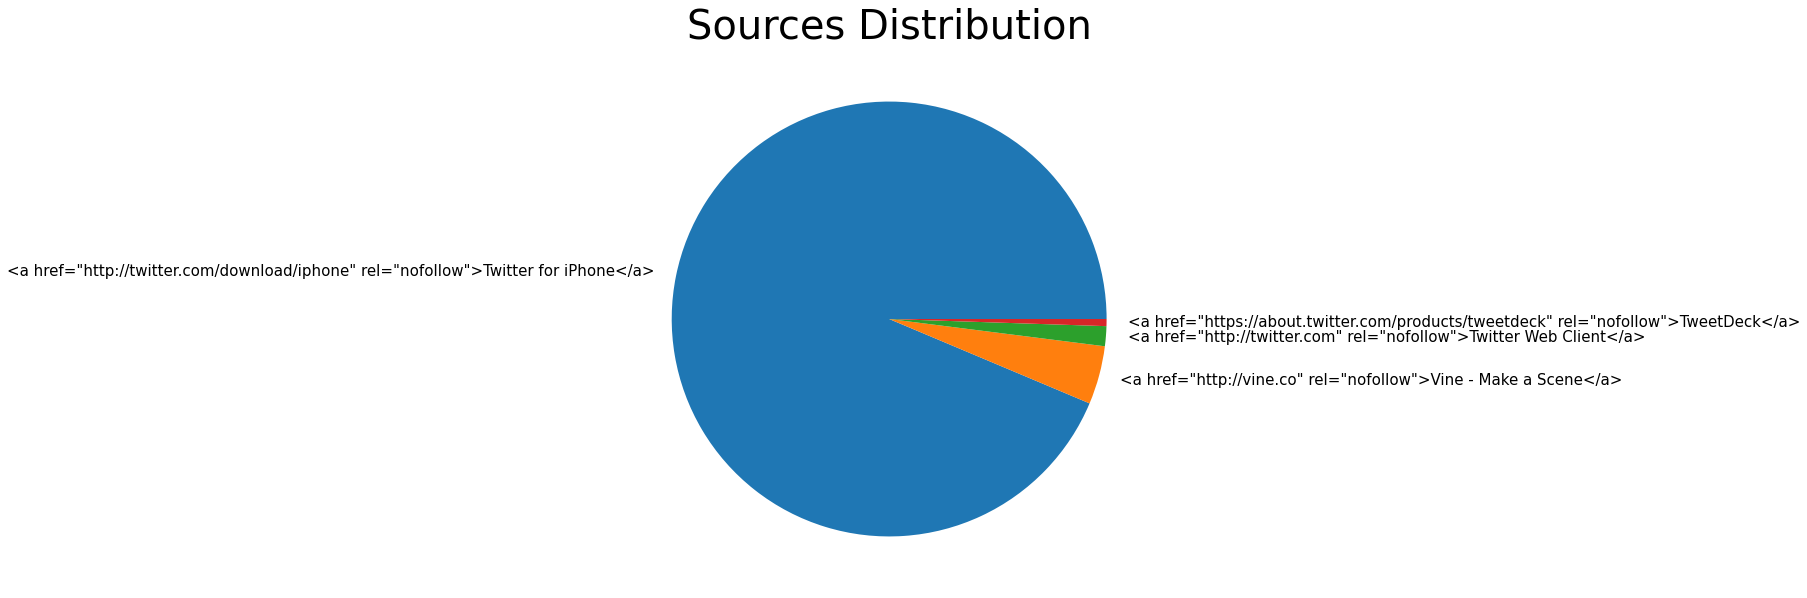

In [106]:
# Plot total counts for 3 sources in pie chart
plt.title("Sources Distribution", size=40)
df_all['source'].value_counts().plot(kind='pie',figsize=(10,10),fontsize=15)
plt.ylabel('');

***